In [92]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
def metricks(bigdata):
    Y = bigdata['MedHouseVal']
    X = bigdata.drop(columns = 'MedHouseVal')
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    model.fit(X_train, y_train)

    print(mean_squared_error(y_train, model.predict(X_train), squared=False))
    print(mean_squared_error(y_test, model.predict(X_test), squared=False))
    print(r2_score(y_train, model.predict(X_train)))
    print(r2_score(y_test, model.predict(X_test)))

## Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [94]:
data = fetch_california_housing()
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [95]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [96]:
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df['MedHouseVal'] = pd.Series(data.target)

## Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [97]:
df[df.isna()].count()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [98]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
## Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [99]:
metricks(df)

0.7195621189670309
0.7422807584162253
0.6107324496767872
0.587936506728645


## Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

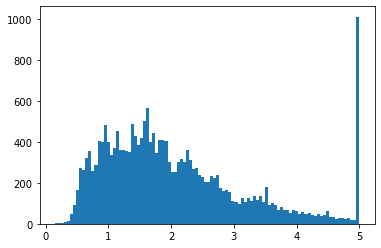

In [100]:
plt.hist(df['MedHouseVal'], bins = 100)
plt.show()

### Значение 5 сильно выбивается своим количеством повторений. Непонятно, выбросы это или нет, так как количество строк с таким значением целевой переменной немалочисленно, а само значение в принципе не выбивается из диапазона по сравнению с остальными. Смущает график распределения, который очень отдалённо выглядит как график нормального распределения с неожиданным пиком в диапазоне >4.9. Я думаю, что это может быть выбросом, связанным с неправильным занесением данных. Возможно, что по этим строкам не было информации о стоимости, но было известно, что они достаточно дороги, поэтому в целевой столбец внесли максимальное значение. Считаю, что будет правильным удалить такие строки.

In [101]:
df = df[df['MedHouseVal'] < 4.9]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


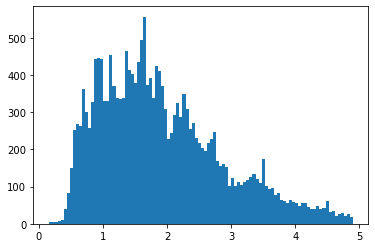

In [102]:
plt.hist(df['MedHouseVal'], bins = 100)
plt.show()

## Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
### a. Сделайте выводы.
### b. Удалите признаки на основании полученных значений, выводов.
### c. Повторите п. 3, п. 4 на измененных данных.

<AxesSubplot:>

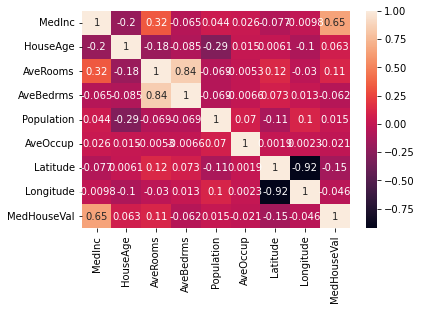

In [103]:
sn.heatmap(df.corr(), annot=True)

### Матрица корелляций показывает, что наиболее значимые признаки, если судить чисто по коээфициенту корелляции с целевой переменной, это: 'MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'MedHouseVal'

In [104]:
df = df[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'AveOccup', 'MedHouseVal', 'Longitude']]
df

,MedInc,HouseAge,AveRooms,Latitude,AveOccup,MedHouseVal,Longitude
0,8.3252,41.0,6.984127,37.88,2.555556,4.526,-122.23
1,8.3014,21.0,6.238137,37.86,2.109842,3.585,-122.22
2,7.2574,52.0,8.288136,37.85,2.802260,3.521,-122.24
3,5.6431,52.0,5.817352,37.85,2.547945,3.413,-122.25
4,3.8462,52.0,6.281853,37.85,2.181467,3.422,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48,2.560606,0.781,-121.09
20636,2.5568,18.0,6.114035,39.49,3.122807,0.771,-121.21
20637,1.7000,17.0,5.205543,39.43,2.325635,0.923,-121.22
20638,1.8672,18.0,5.329513,39.43,2.123209,0.847,-121.32


In [105]:
metricks(df)

0.6361890053414571
0.6403835333668303
0.5611891602253762
0.5645390072382444


## Исследуйте оставленные признаки на выбросы.
### a. Удалите выбросы в случае обнаружения.
### b. Повторите п. 3, п. 4 на измененных данных.

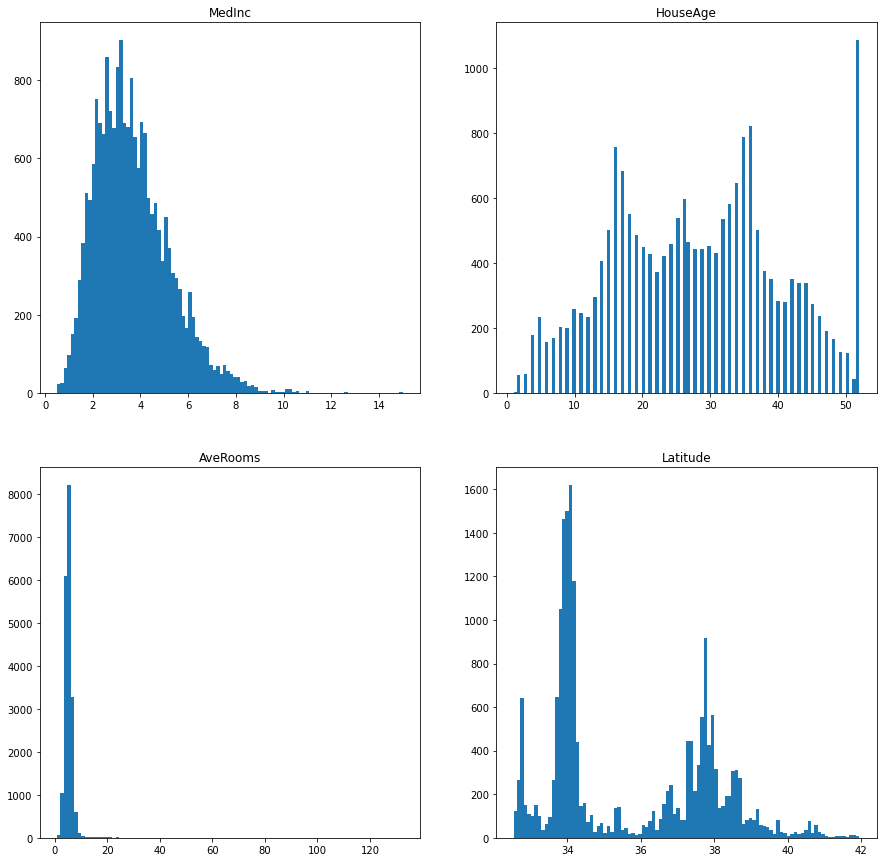

In [106]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title('MedInc')
plt.hist(df['MedInc'], bins = 100)
plt.subplot(2, 2, 2)
plt.title('HouseAge')
plt.hist(df['HouseAge'], bins = 100)
plt.subplot(2, 2, 3)
plt.title('AveRooms')
plt.hist(df['AveRooms'], bins = 100)
plt.subplot(2, 2, 4)
plt.title('Latitude')
plt.hist(df['Latitude'], bins = 100)
plt.show()

In [107]:
df = df[(df['MedInc'] < 9) & (df['HouseAge'] < 51.5) & (df['AveRooms'] < 10)] 

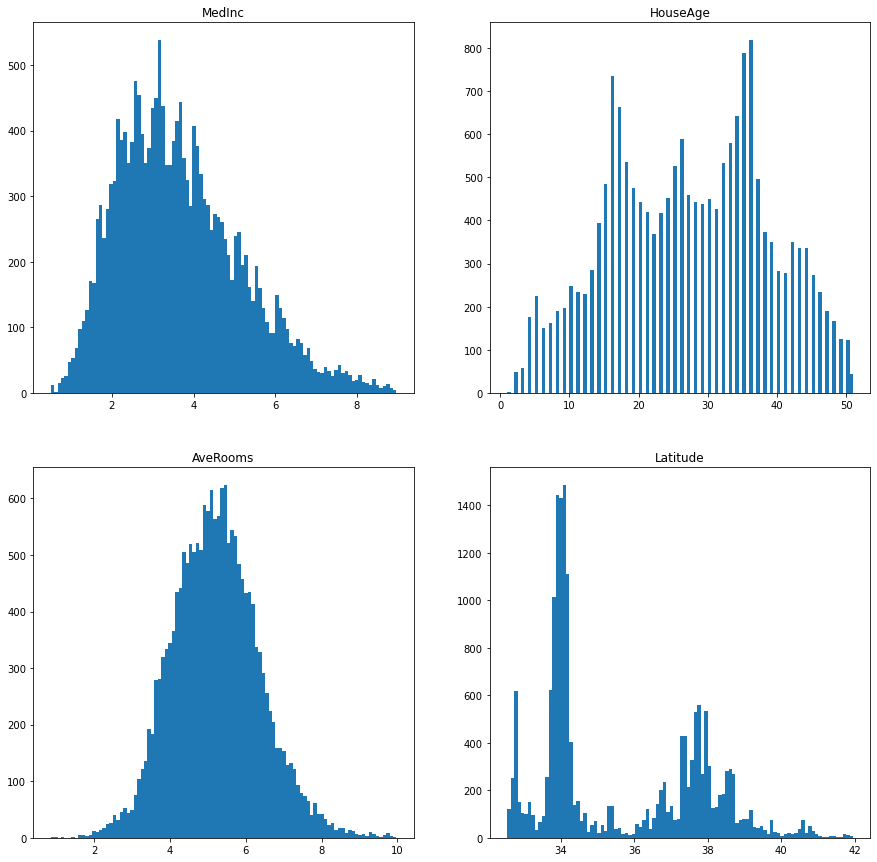

In [108]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.title('MedInc')
plt.hist(df['MedInc'], bins = 100)
plt.subplot(2, 2, 2)
plt.title('HouseAge')
plt.hist(df['HouseAge'], bins = 100)
plt.subplot(2, 2, 3)
plt.title('AveRooms')
plt.hist(df['AveRooms'], bins = 100)
plt.subplot(2, 2, 4)
plt.title('Latitude')
plt.hist(df['Latitude'], bins = 100)
plt.show()

In [109]:
metricks(df)

0.6094737947191888
0.6250682089782978
0.5816720774371971
0.5408047800151151


## Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
### a. Повторите п. 3, п. 4 на измененных данных.

In [110]:
for i in df.columns[0:4]:
    if i == 'Latitude':
        df[i + '1'] = np.log(df[i])
    df[i + '2'] = np.square(df[i])
    df[i + '3'] = np.power(df[i], 3)
    df[i + '4'] = np.sqrt(df[i])
df

C:\Users\s-svo\AppData\Local\Temp/ipykernel_14004/829509178.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i + '2'] = np.square(df[i])
C:\Users\s-svo\AppData\Local\Temp/ipykernel_14004/829509178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i + '3'] = np.power(df[i], 3)
C:\Users\s-svo\AppData\Local\Temp/ipykernel_14004/829509178.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,MedInc,HouseAge,AveRooms,Latitude,AveOccup,MedHouseVal,Longitude,MedInc2,MedInc3,MedInc4,HouseAge2,HouseAge3,HouseAge4,AveRooms2,AveRooms3,AveRooms4,Latitude1,Latitude2,Latitude3,Latitude4
0,8.3252,41.0,6.984127,37.88,2.555556,4.526,-122.23,69.308955,577.010912,2.885342,1681.0,68921.0,6.403124,48.778030,340.671954,2.642750,3.634423,1434.8944,54353.799872,6.154673
1,8.3014,21.0,6.238137,37.86,2.109842,3.585,-122.22,68.913242,572.076387,2.881215,441.0,9261.0,4.582576,38.914354,242.753076,2.497626,3.633895,1433.3796,54267.751656,6.153048
8,2.0804,42.0,4.294118,37.84,2.026891,2.267,-122.26,4.328064,9.004105,1.442359,1764.0,74088.0,6.480741,18.439446,79.181152,2.072225,3.633367,1431.8656,54181.794304,6.151423
15,2.1250,50.0,4.242424,37.85,2.640152,1.400,-122.26,4.515625,9.595703,1.457738,2500.0,125000.0,7.071068,17.998163,76.355845,2.059715,3.633631,1432.6225,54224.761625,6.152235
18,1.9911,50.0,5.343675,37.84,2.362768,1.587,-122.26,3.964479,7.893675,1.411063,2500.0,125000.0,7.071068,28.554867,152.587941,2.311639,3.633367,1431.8656,54181.794304,6.151423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,39.48,2.560606,0.781,-121.09,2.434536,3.798607,1.249120,625.0,15625.0,5.000000,25.456612,128.440177,2.246209,3.675794,1558.6704,61536.307392,6.283311
20636,2.5568,18.0,6.114035,39.49,3.122807,0.771,-121.21,6.537226,16.714380,1.599000,324.0,5832.0,4.242641,37.381425,228.551344,2.472657,3.676047,1559.4601,61583.079349,6.284107
20637,1.7000,17.0,5.205543,39.43,2.325635,0.923,-121.22,2.890000,4.913000,1.303840,289.0,4913.0,4.123106,27.097675,141.058105,2.281566,3.674527,1554.7249,61302.802807,6.279331
20638,1.8672,18.0,5.329513,39.43,2.123209,0.847,-121.32,3.486436,6.509873,1.366455,324.0,5832.0,4.242641,28.403708,151.377926,2.308574,3.674527,1554.7249,61302.802807,6.279331


In [111]:
metricks(df)

0.5925394832824333
0.5897057007095506
0.6034320221517475
0.5962455457195975


## Сформулируйте выводы по проделанной работе.
### a. Кратко опишите какие преобразования были сделаны с данными.
### b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
### c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

## Выводы:
### а) Данные проверены на пропуски. Целевая переменная почищена от выбросов. Исключилось некоторое количество признаков на основе матрицы корелляции, после чего оставшиеся тоже были очищены от выбросов.
### б) Сравнивая с первоначальными значениями метрик качества, их значения упали после отбора признаков на основе матрицы корелляции и последующей работы с выбросами. Однако после ввода дополнительных признаков на основе мат. функций значения метрик стали больше, чем первоначальные.
### с) Учитывая потерю точности при отборе признаков на основе матрицы корелляций и ещё одну потерю точности после работы с выбросами, сделать это можно было качественнее, но ничего более успешного добиться не удалось при попытке сократить количество признаков, удалить выбросы и т.д. Так что спраавился как мог, но думаю, можно было лучше.